## 1: Import dataset , libraries and map

In [1]:
### import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import os
import urllib.request

images_path = os.path.join('.', "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
california_img=matplotlib.image.imread(os.path.join(images_path, filename))

housing = pd.read_csv('housing.csv')
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## 2: Data overview

### 2.1: Check data types and null values

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The dataset has a total of **20640** sample data, among which 207 values are missing from attribute **total_bedrooms**.

Except for the **ocean_proximity** attribute, all the other data types are numeric. We can use the **value_counts()** method to view the classifications it contains

In [3]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 2.2 The statistical value of data

In [4]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## 3: Exploratory Data Analysis and Data visualization

### 3.1: The numerical distribution of each attribute

<Figure size 600x400 with 0 Axes>

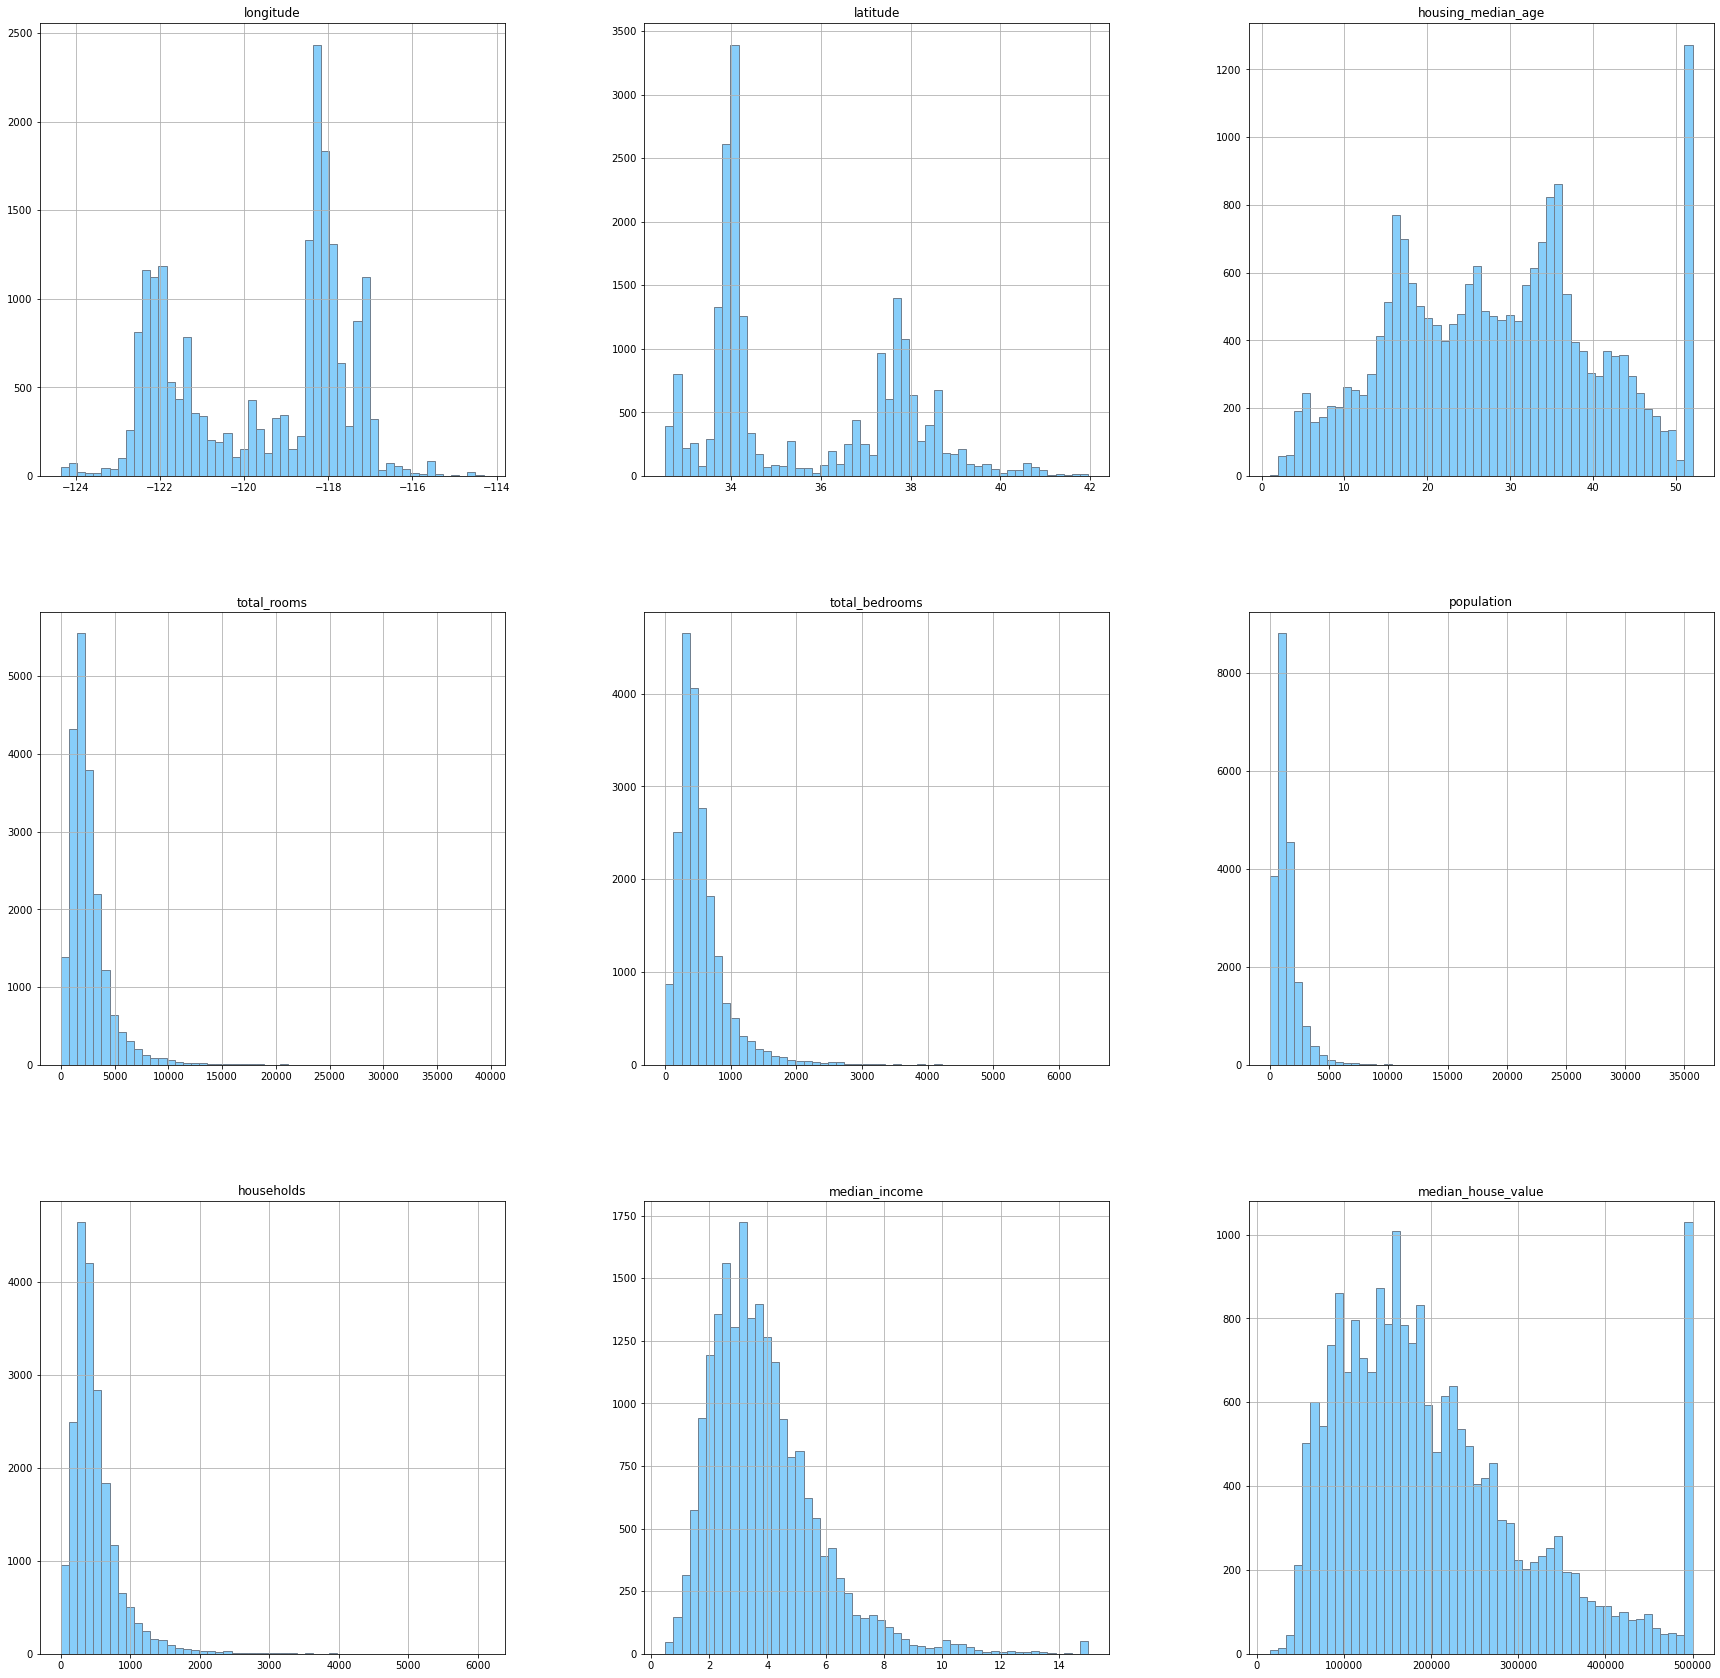

In [5]:
plt.figure(dpi=100)
housing.hist(bins=52, figsize=(30,30), facecolor='lightskyblue',edgecolor='slategray', histtype='bar')
plt.show()

### 3.2: Visualize geographic population and house value data

<Figure size 1200x800 with 0 Axes>

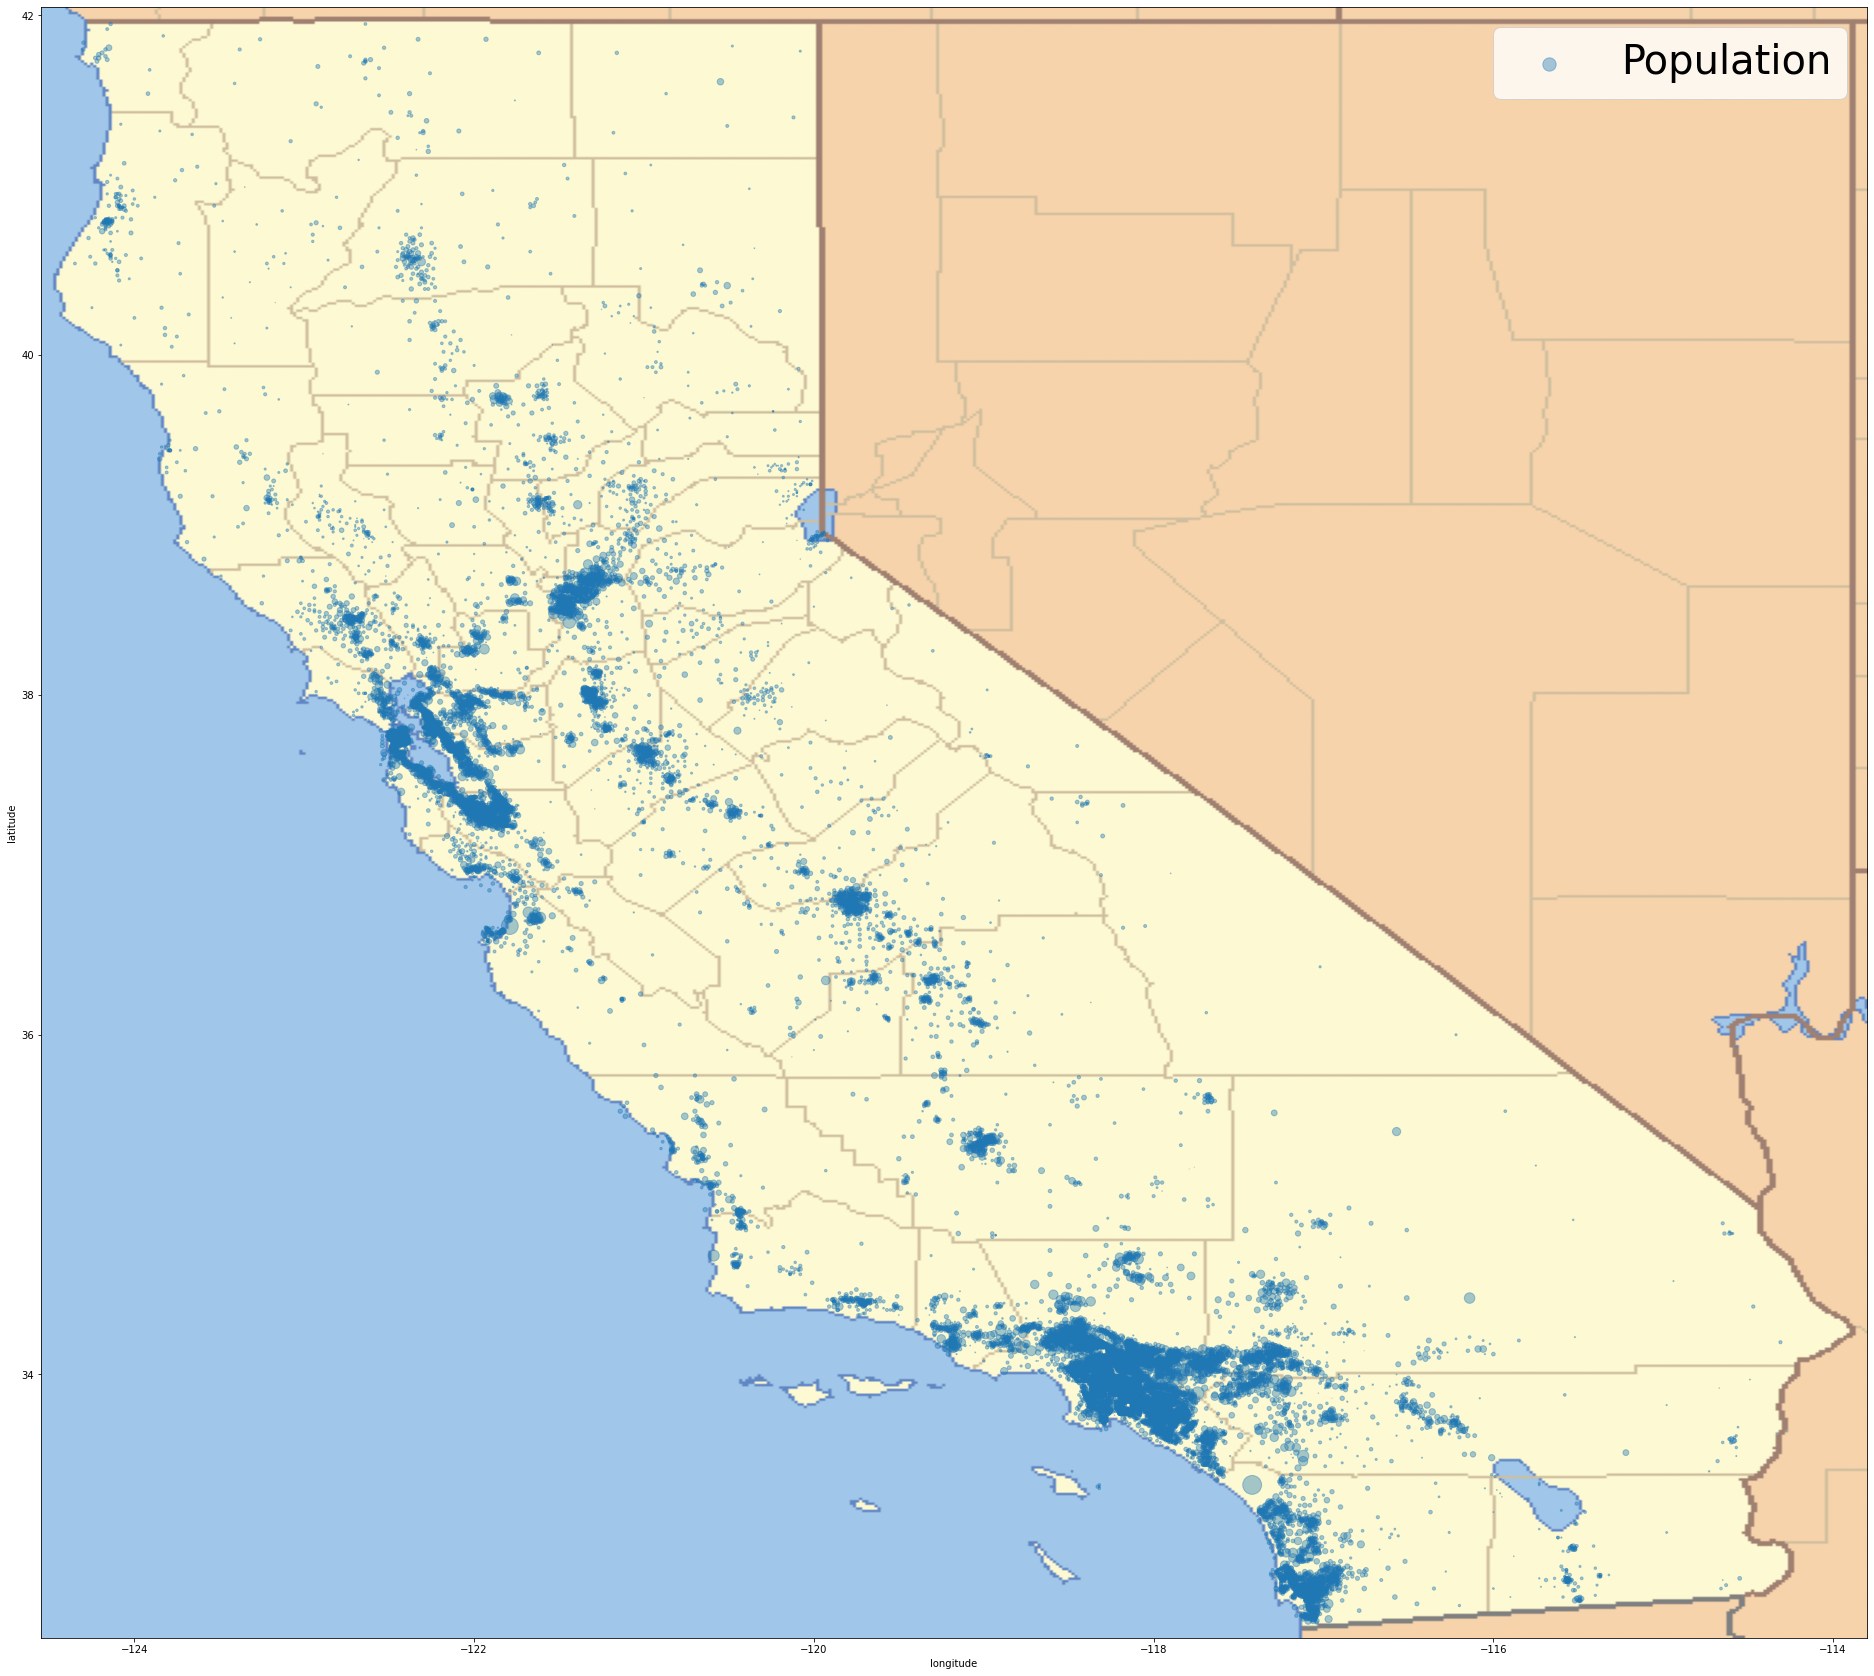

In [6]:
plt.figure(dpi=200)
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(40,30),s=housing['population']/100, label="Population",alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
plt.legend(fontsize=40)
plt.show()

<Figure size 1200x800 with 0 Axes>

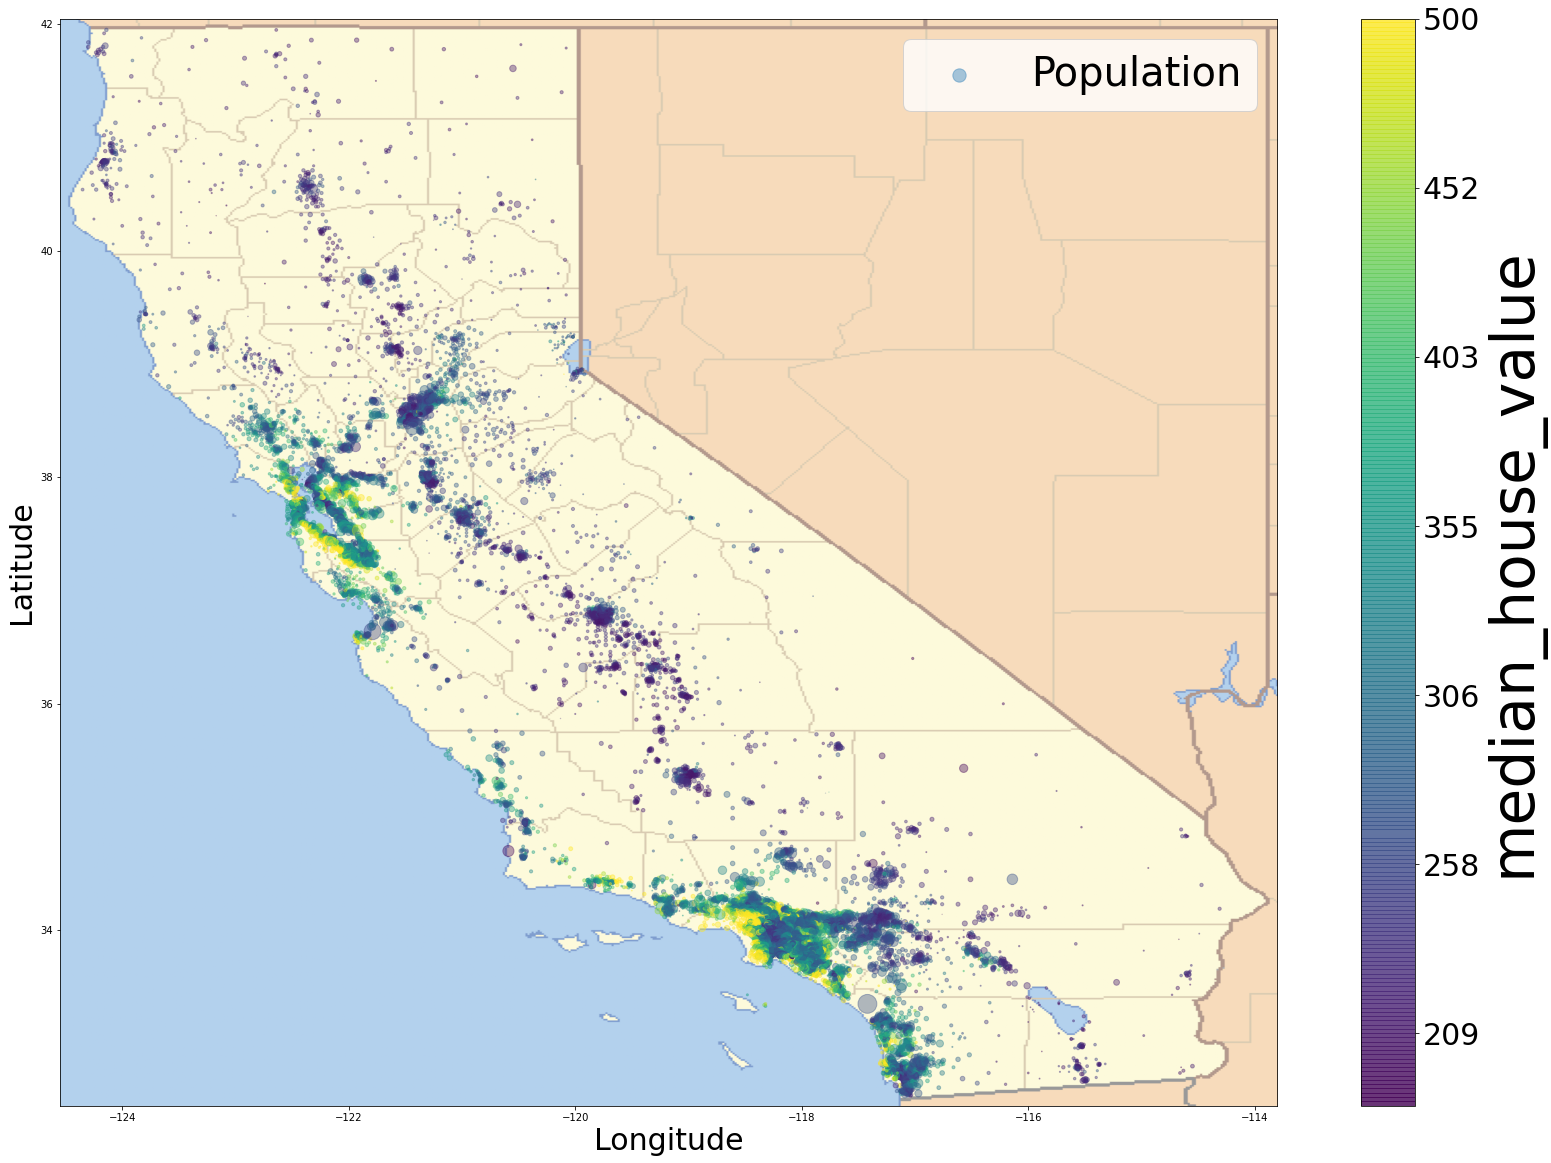

In [7]:
plt.figure(dpi=200)
attr = 'median_house_value'

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(30,20),
                    s=housing['population']/100, label="Population",
                    c=attr, cmap=plt.get_cmap('viridis'),
                    colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.8,
               cmap=plt.get_cmap('viridis'))
plt.ylabel("Latitude", fontsize=30)
plt.xlabel("Longitude", fontsize=30)

prices = housing[attr]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels([(round(v/1000)) for v in tick_values], fontsize=30)
cbar.set_label(attr, fontsize=60)

plt.legend(fontsize=40)
plt.show()

### 3.3: Attribute value Corelation heat map

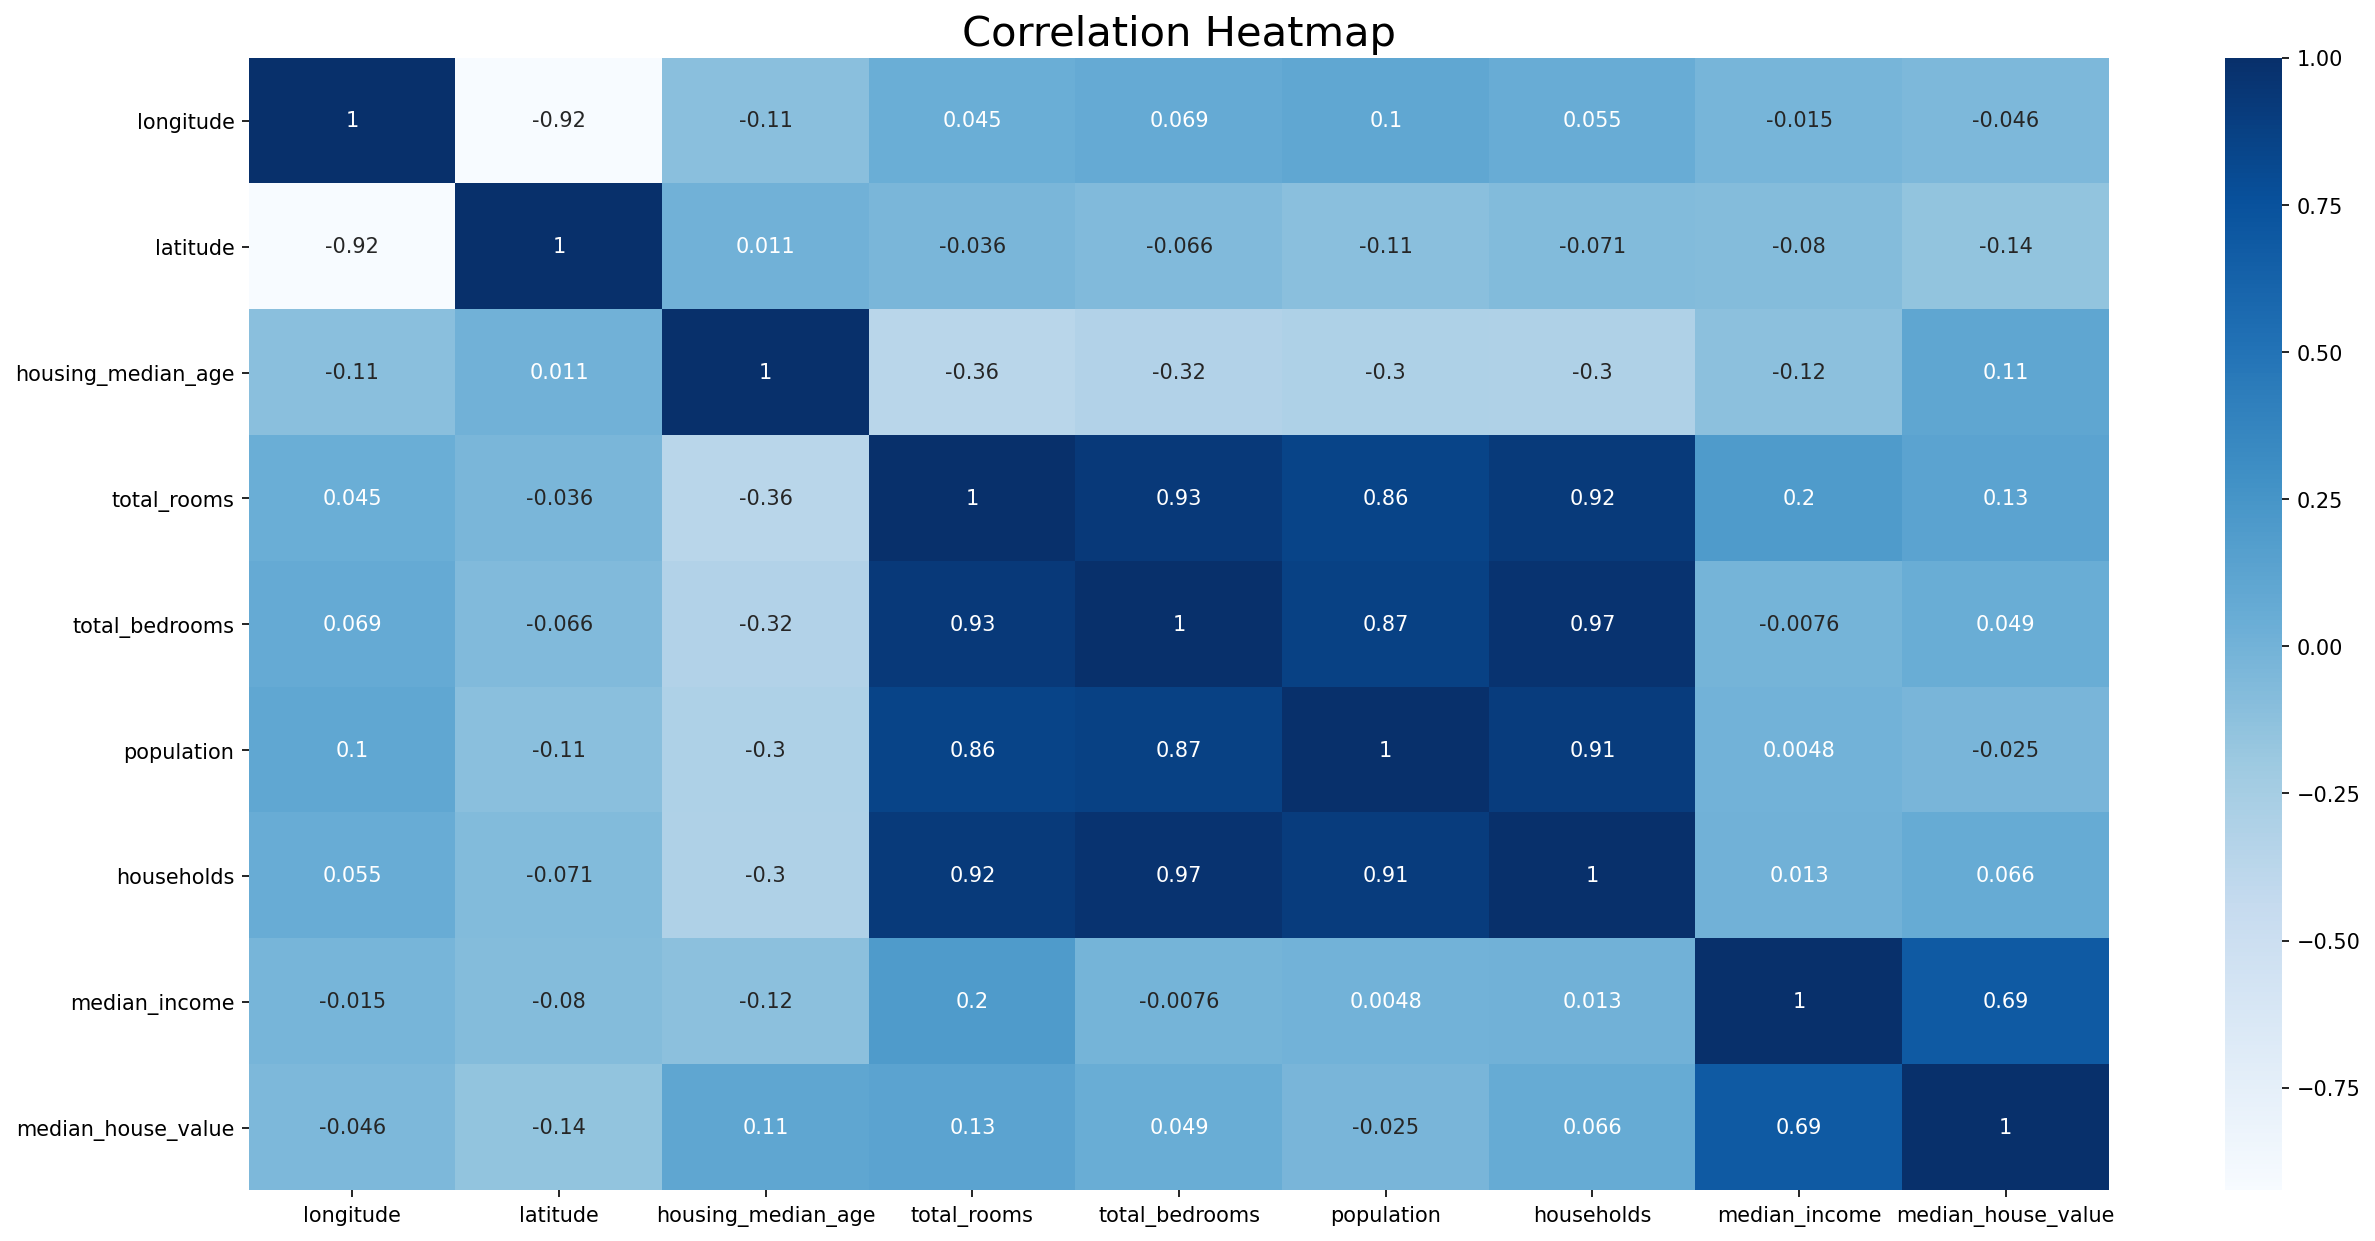

In [26]:
plt.figure(dpi=150)
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(housing.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap",fontsize=20)
plt.show()

It is not difficult to find from the heat map that there is a strong positive correlation between ***total_rooms, total_bedrooms, population , households*** and a strong negative correlation between ***latitude and longitude***,

Here we mainly explore the correlation between housing price and other attributes:

***median_house_value & median_income***

### 3.4: Correlation between variables

#### 3.4.1: distribution between ***median_house_value, median_income, total_rooms , housing_median_age***

<Figure size 4000x2000 with 0 Axes>

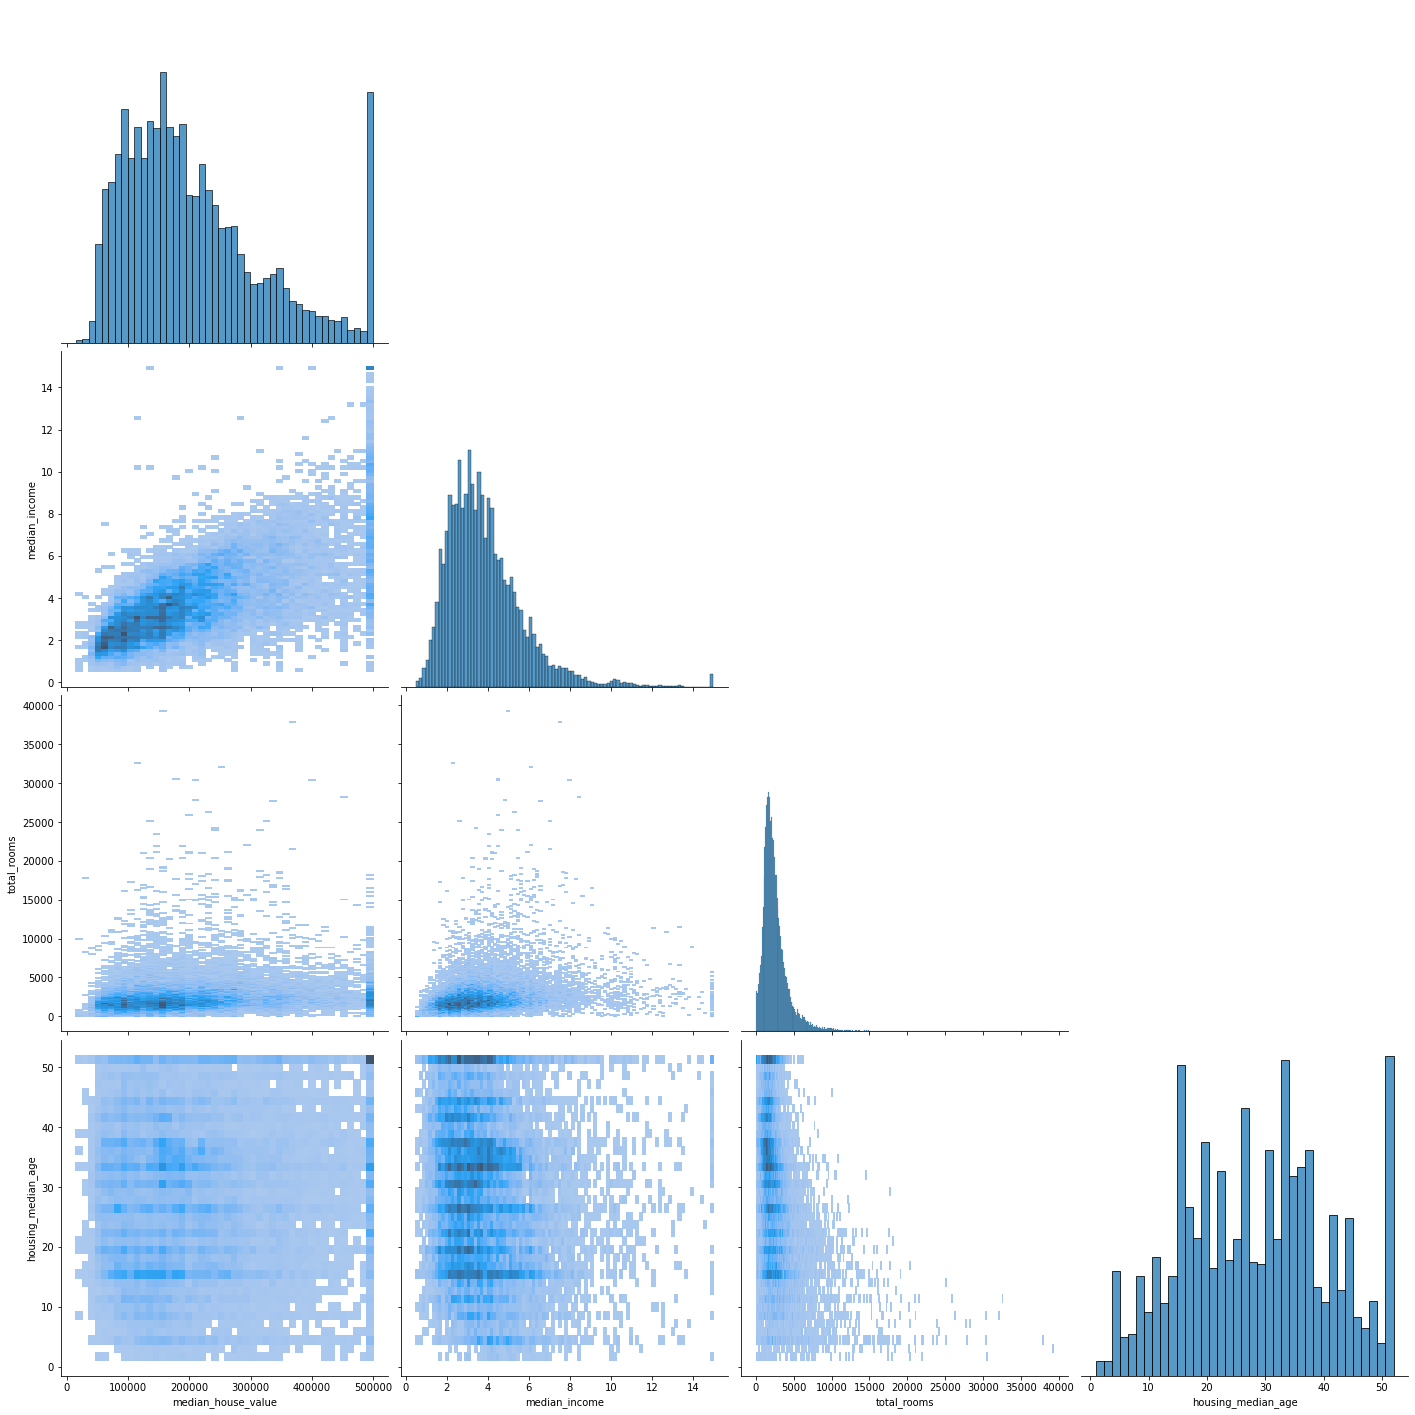

In [9]:
plt.figure(dpi=200)
sns.pairplot(housing[["median_house_value", "median_income", "total_rooms","housing_median_age"]], 
             height=5, kind='hist',corner=True)
plt.show()

#### 3.4.2: correlation between ***median_income and median_house_value*** with***ocean_proximity***

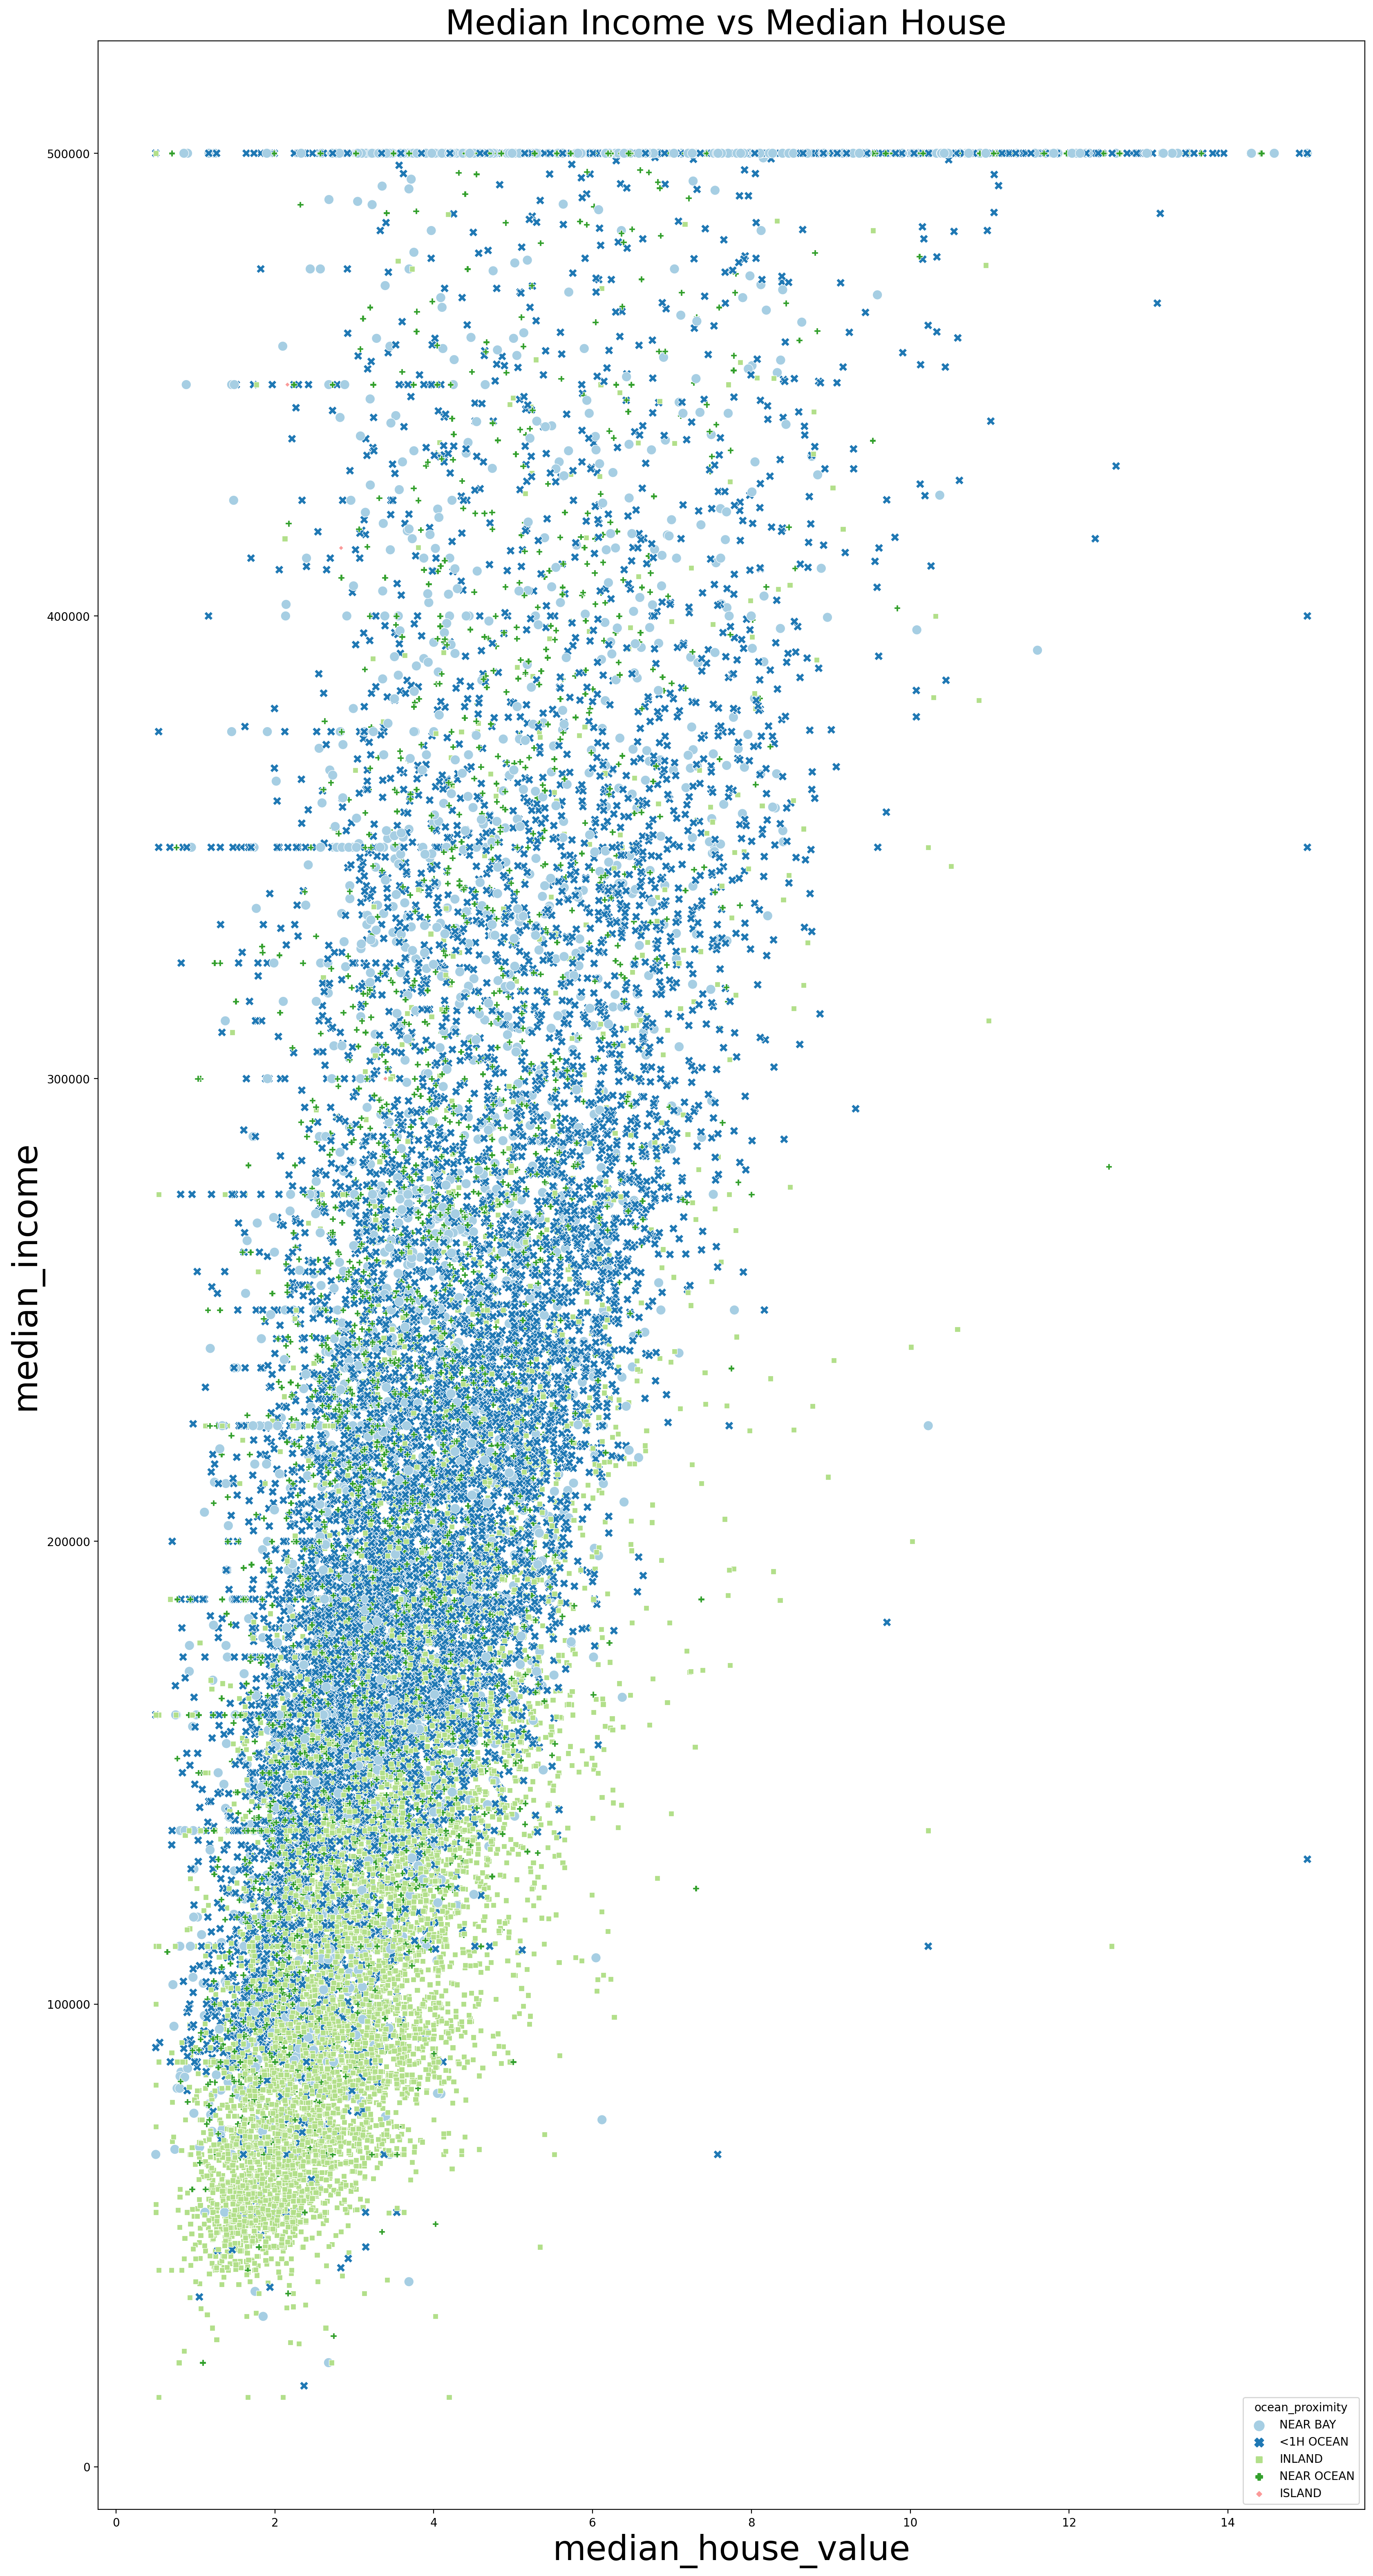

In [44]:
plt.figure(dpi=200)
plt.rcParams["figure.figsize"] = (20, 40)
sns.scatterplot(x="median_income", y="median_house_value", hue="ocean_proximity", 
                data=housing, palette='Paired', size="ocean_proximity", style="ocean_proximity")
plt.title("Median Income vs Median House ",fontsize=30)
plt.ylabel("median_income", fontsize=30)
plt.xlabel("median_house_value", fontsize=30)
plt.show()

We can see a lot of data aggregated at 500001, And there are about 5.8% data over 500000 being processed to 500000. They will affect the accuracy of the conclusion.

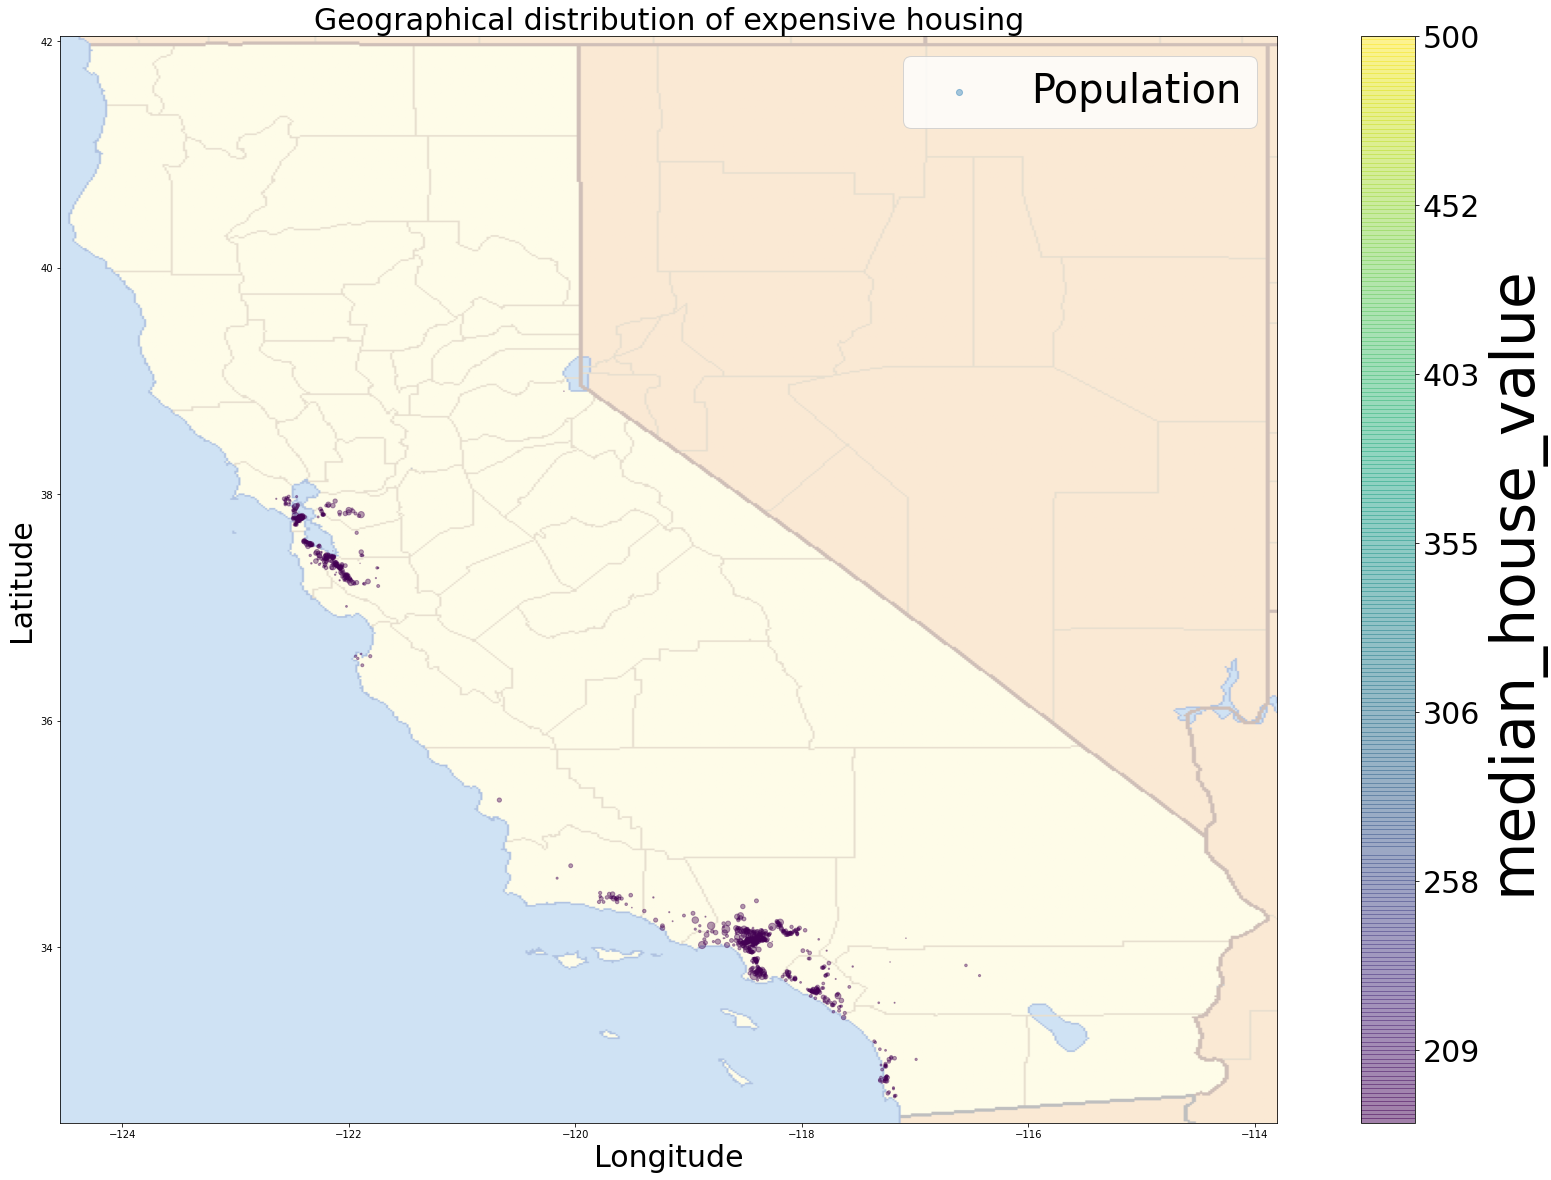

In [11]:
attr = 'median_house_value'
plt.rcParams["figure.figsize"] = (15, 15)
expensive_ho = housing[housing['median_house_value']== 500001.0]

ax = expensive_ho.plot(kind="scatter", x="longitude", y="latitude", figsize=(30,20),
                    s=expensive_ho['population']/100, label="Population",
                    c=attr, cmap=plt.get_cmap('viridis'),
                    colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
               cmap=plt.get_cmap('viridis'))
plt.ylabel("Latitude", fontsize=30)
plt.xlabel("Longitude", fontsize=30)

prices = housing[attr]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels([(round(v/1000)) for v in tick_values], fontsize=30)
cbar.set_label(attr, fontsize=60)

plt.title("Geographical distribution of expensive housing",fontsize=30)
plt.legend(fontsize=40)
plt.show()

#### 3.4.3 correlation between house value and ocean proiximity

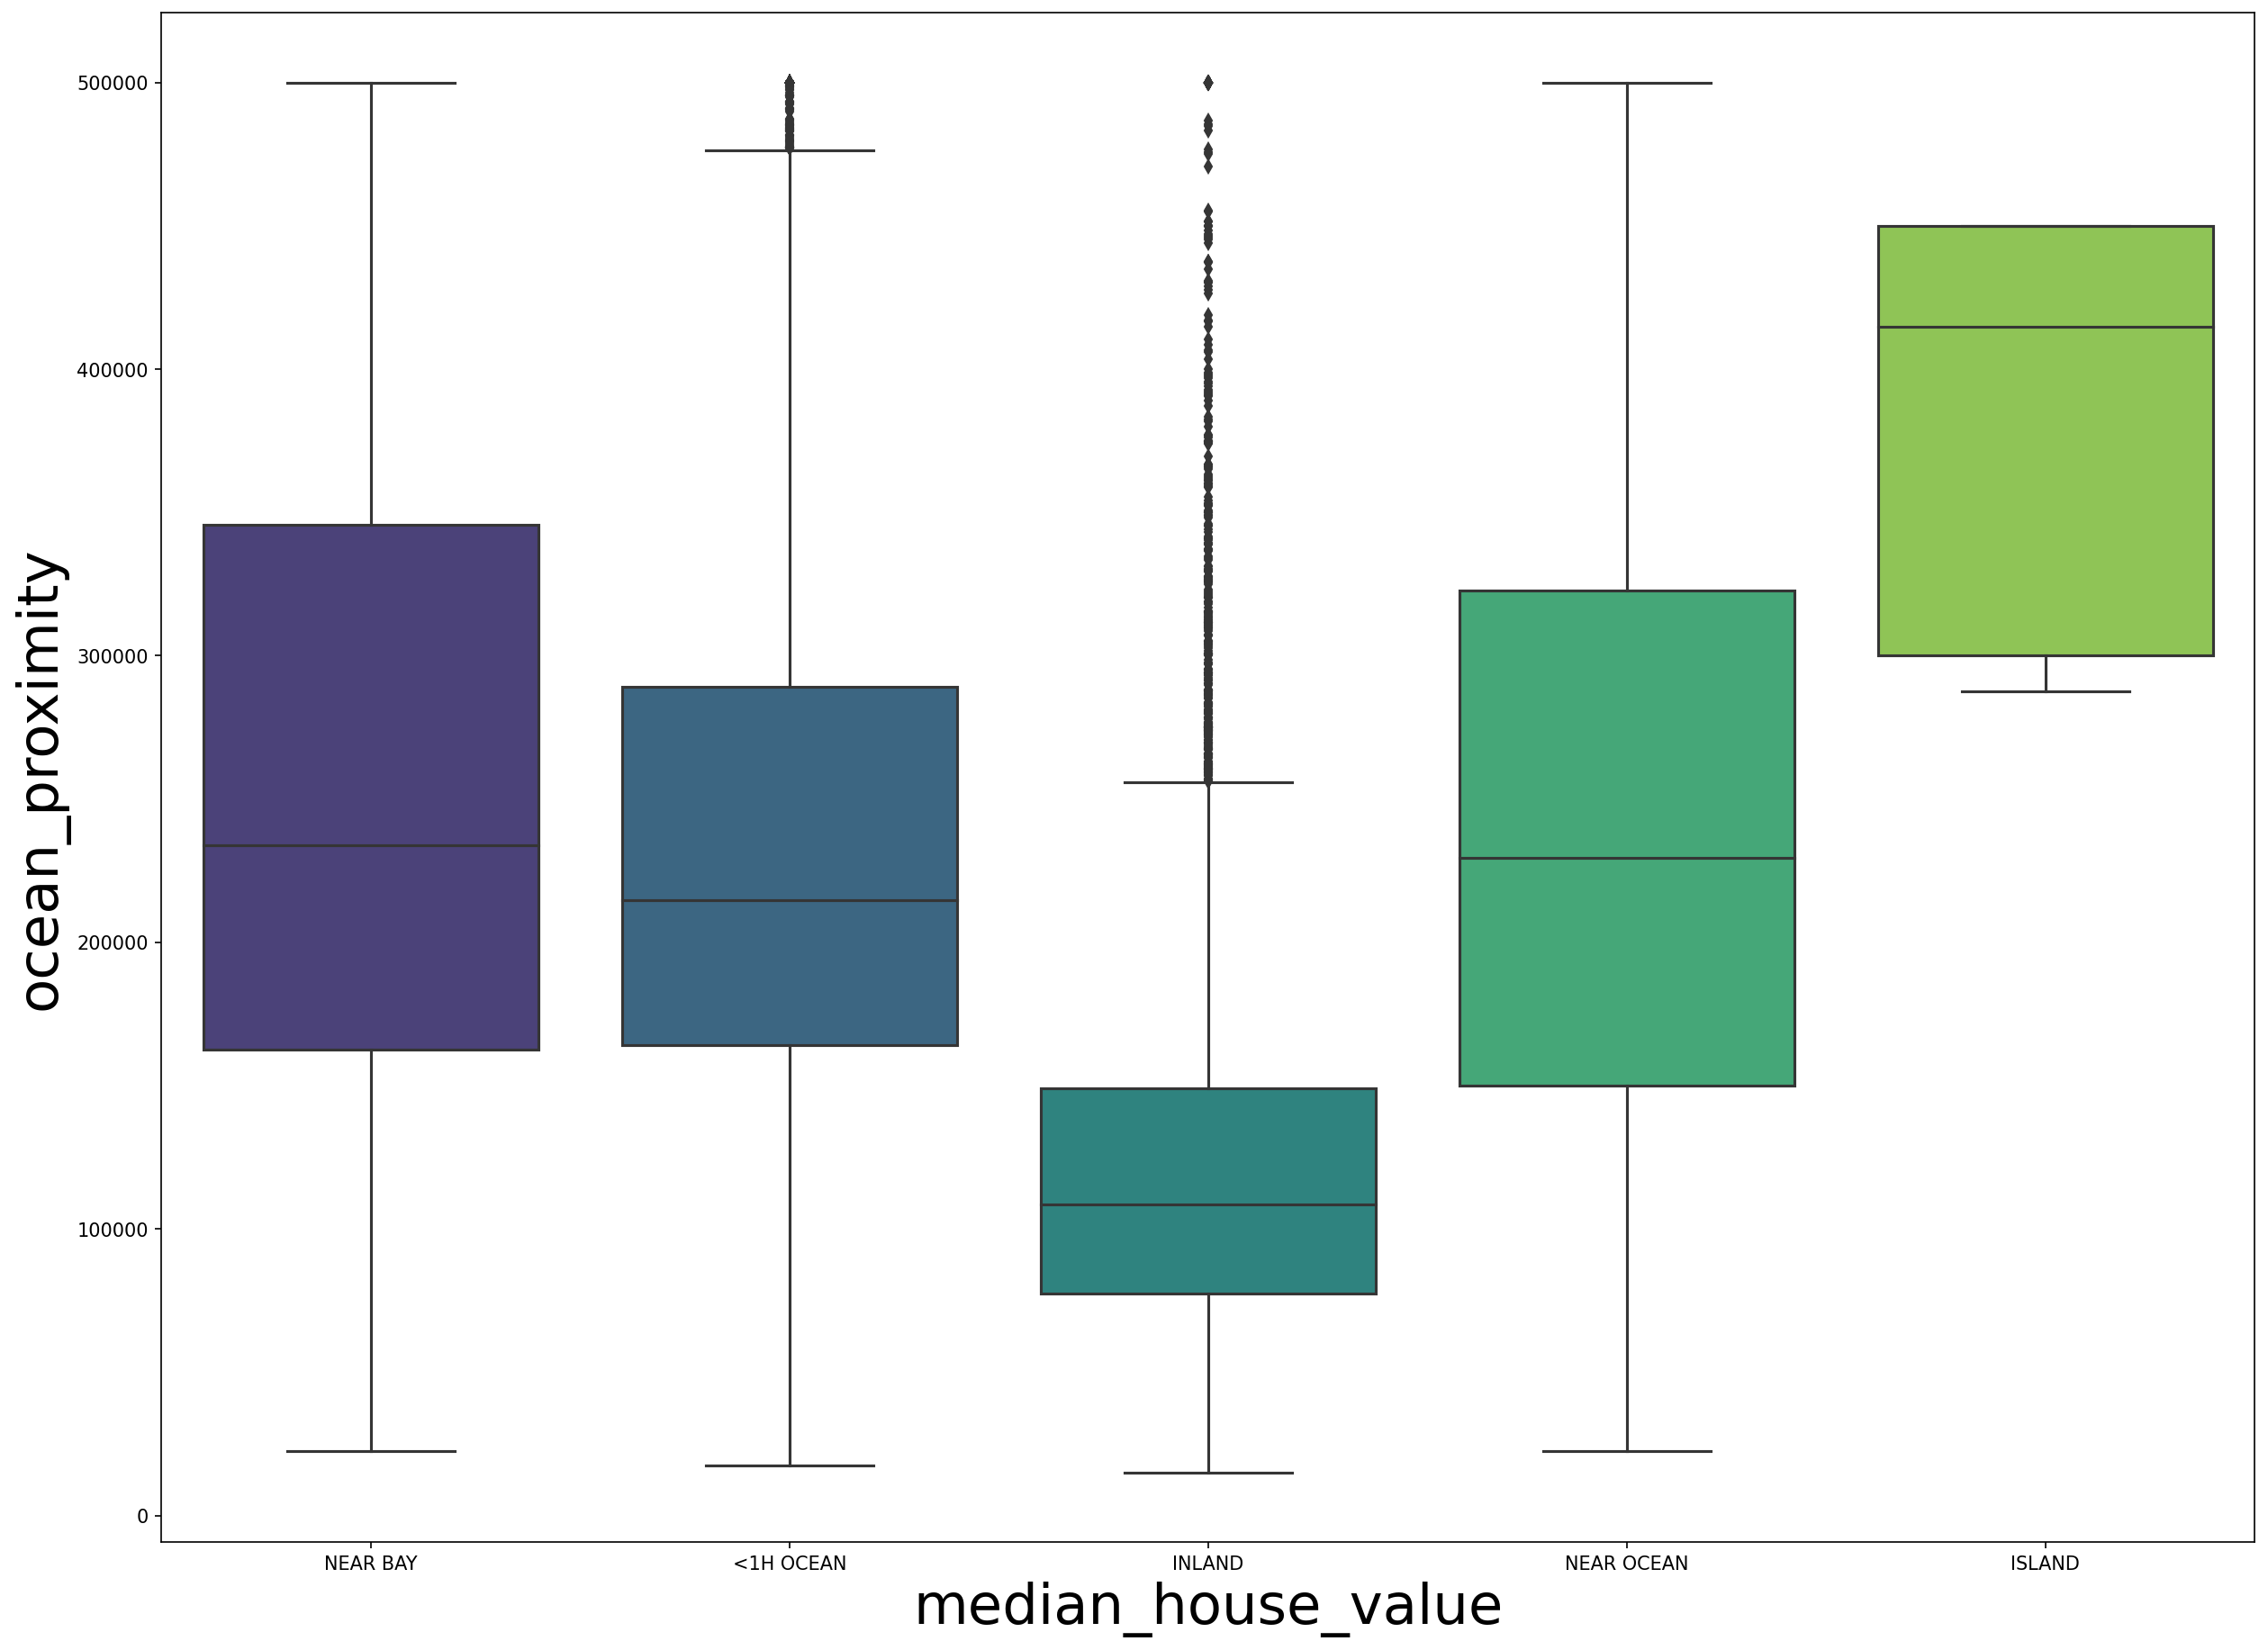

In [32]:
plt.figure(dpi=150)
plt.rcParams["figure.figsize"] = (20, 15)
sns.boxplot(data=housing, x='ocean_proximity',y='median_house_value',palette='viridis')
plt.ylabel("ocean_proximity", fontsize=30)
plt.xlabel("median_house_value", fontsize=30)
plt.show()

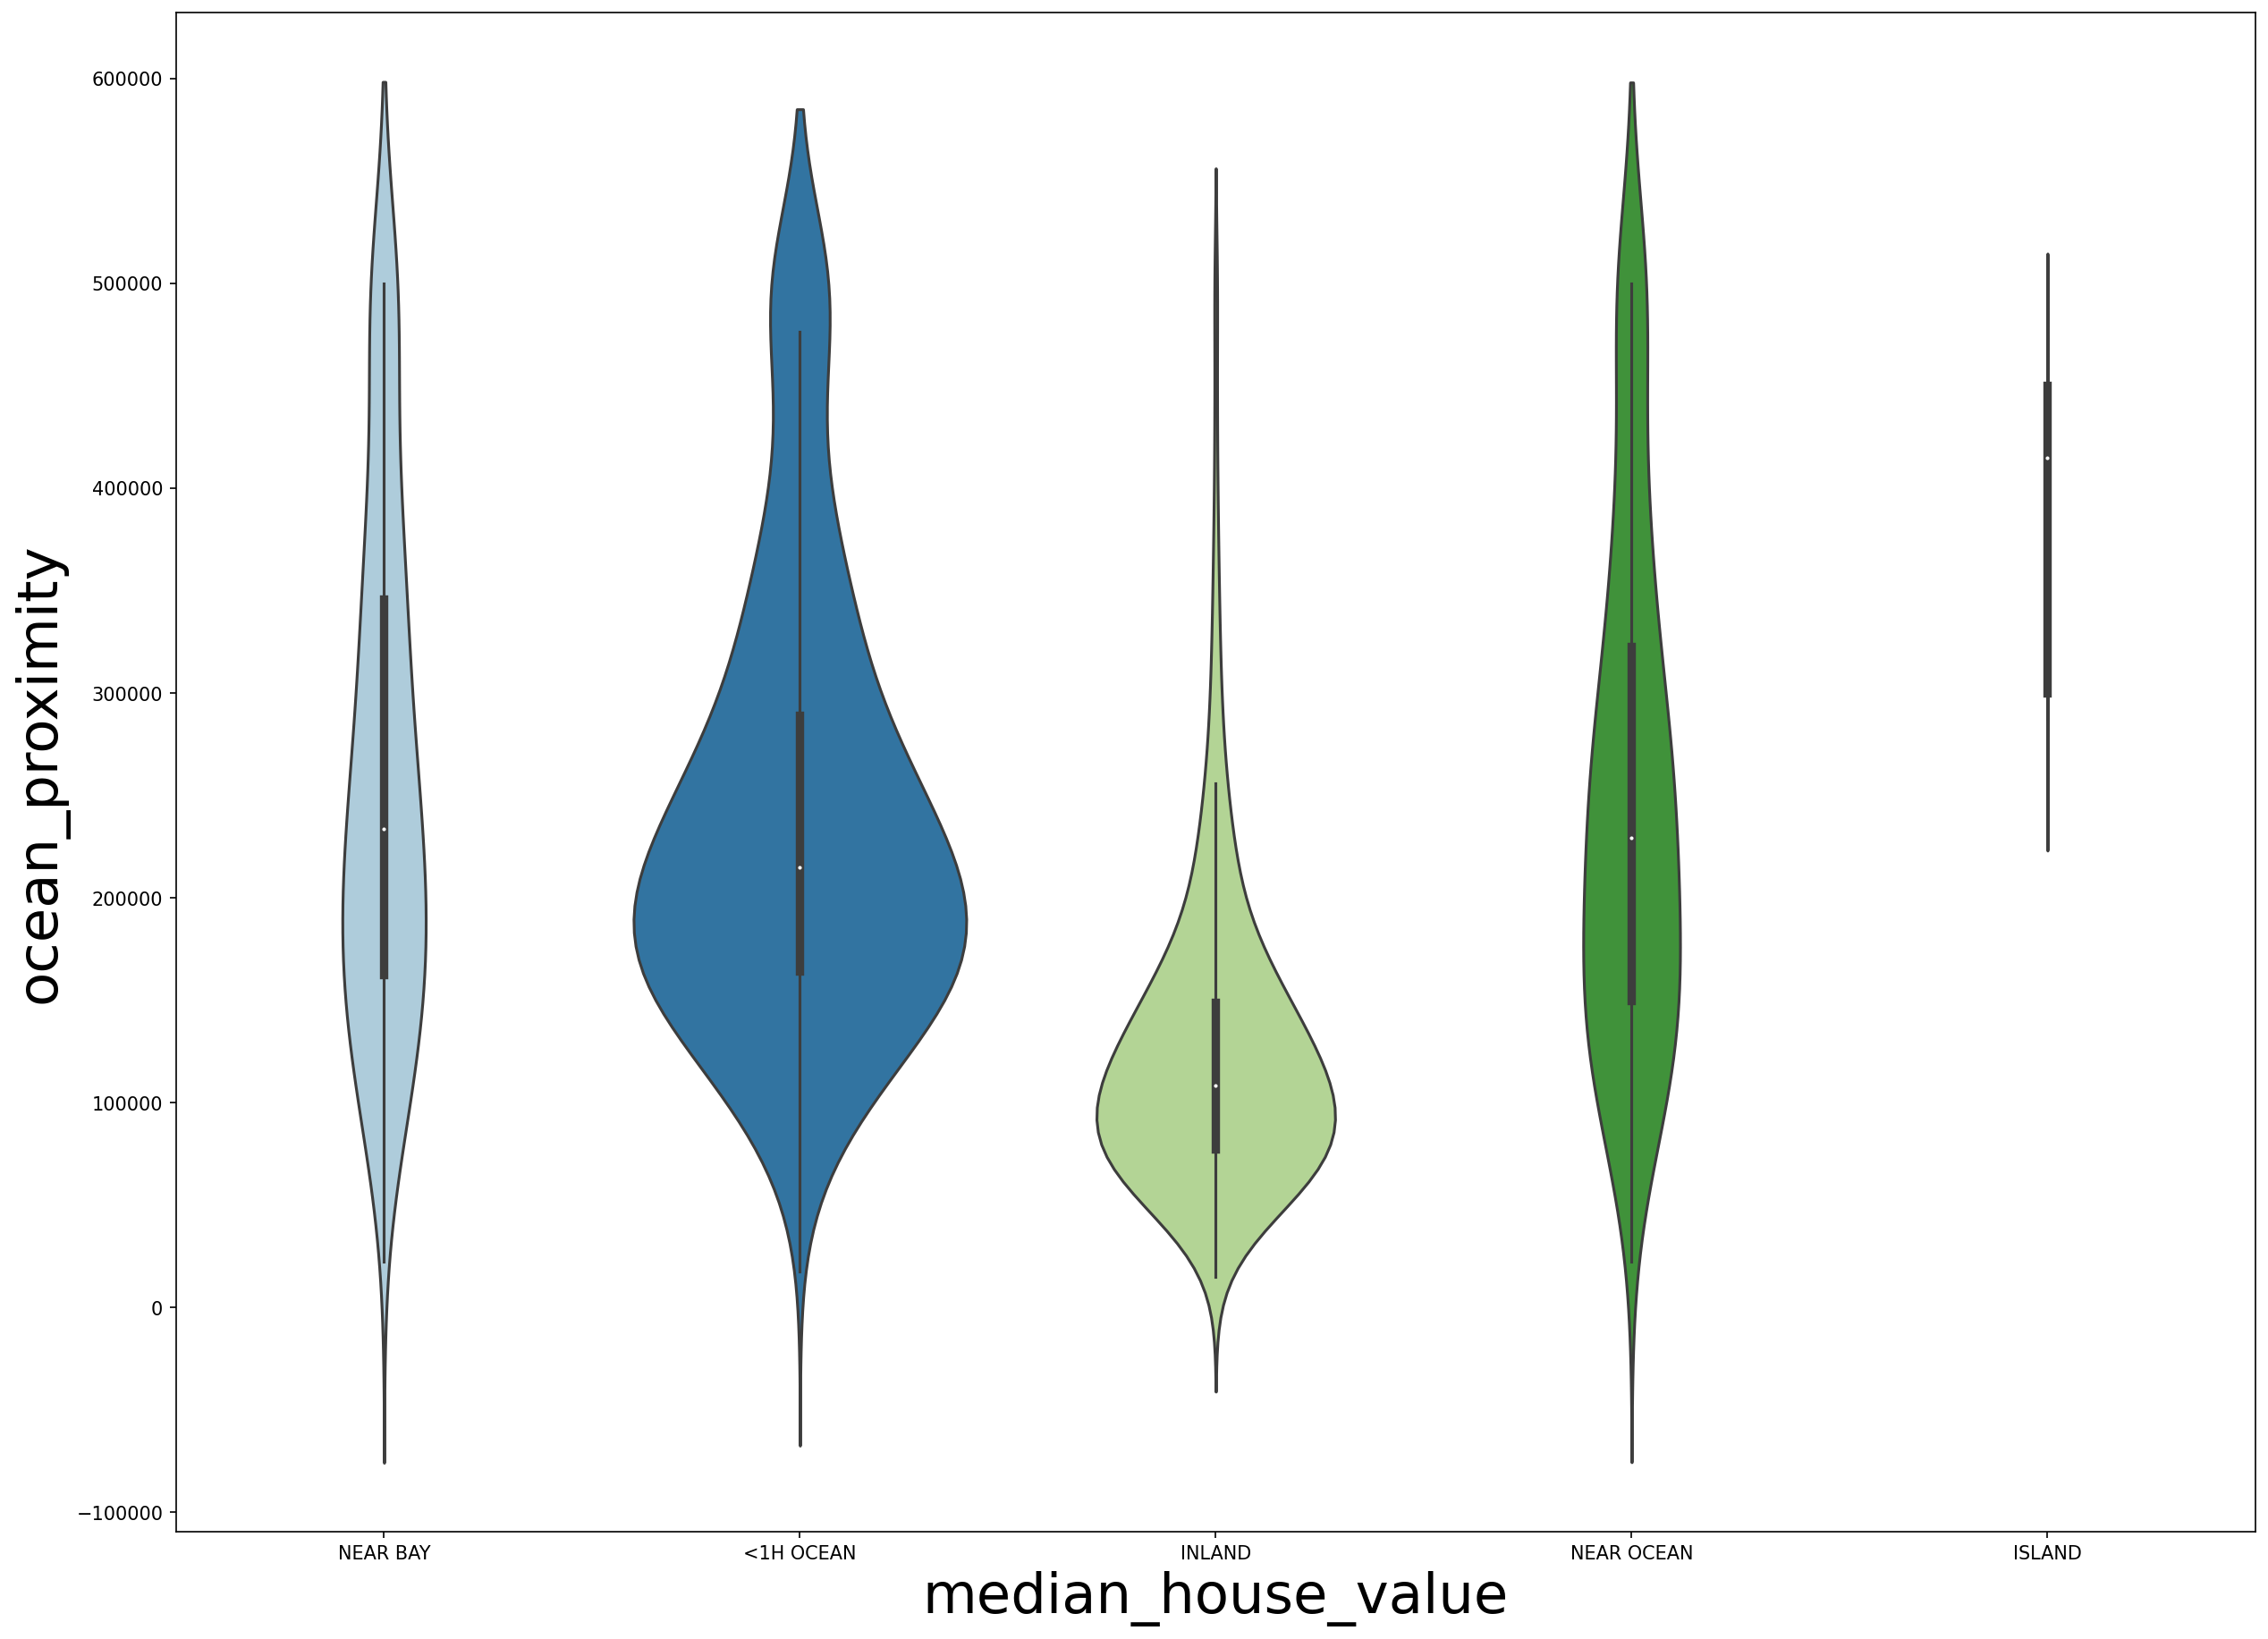

In [33]:
plt.figure(dpi=150)
plt.rcParams["figure.figsize"] = (20, 15)
sns.violinplot(x='ocean_proximity',y='median_house_value',data=housing,scale='count',inner='box',bw=0.4 ,palette = 'Paired')
plt.ylabel("ocean_proximity", fontsize=30)
plt.xlabel("median_house_value", fontsize=30)
plt.show()

## 4: Machine learning

## 4.1 Data preparing

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
housing.total_bedrooms.fillna(housing.total_bedrooms.median(), inplace=True)

Replace the missing data with the median

In [14]:
new_housing = pd.get_dummies(housing)
new_housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
20635                          0                       1   
20636                          0                       1   
20637                          0                       1   
20638                          0                       1   
20639                          0                       1   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                           0                         1   
1                           0                         1   
2                           0                         1   
3                           0                         1   
4                           0                         1   
...                       ...                       ...   
20635                       0                         0   
20636                       0                         0   
20637                       0                         0   
20638                       0                         0   
20639                       0                         0   

       ocean_proximity_NEAR OCEAN  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  
...                           ...  
20635                           0  
20636                           0  
20637                           0  
20638                           0  
20639                           0  

[20640 rows x 14 columns]

Turn ocean_proximity into one-hot encoding

### 4.2: Split data into training and testing

In [15]:
from sklearn.model_selection import train_test_split

X = new_housing.drop(['median_house_value'], axis=1)
y = new_housing.median_house_value.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33,
                                                   random_state=42)

### DecisionTreeRegressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor() 
reg.fit(X_train, y_train) 

predictions=reg.predict(X_test)
print(f'actual: {y_test.mean()}')
print(f'predictions: {predictions.mean()}')

print('MAE: ' + str(mean_absolute_error(y_test, predictions)))
print('MSE: ' + str(mean_squared_error(y_test, predictions)))
print('Score: '+ str(r2_score(y_test, predictions)))

actual: 207245.9655020552
predictions: 208734.10510863183
MAE: 44535.362742219615
MSE: 4926012094.317528
Score: 0.630343512691018


### RandomForestRegressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import dtreeviz
from sklearn import tree
reg = RandomForestRegressor()
reg.fit(X_train, y_train.ravel()) #  fitting train data and train feature

actual = y_test
predictions = reg.predict(X_test)
print(f'Actual mean: {np.mean(actual)}')
print(f'Predicted mean: {np.mean(predictions)}')

print('MAE: ' + str(mean_absolute_error(y_test, predictions)))
print('MSE: ' + str(mean_squared_error(y_test, predictions)))
print('Score: '+ str(r2_score(y_test, predictions)))

Actual mean: 207245.9655020552
Predicted mean: 208030.858140047
MAE: 32249.26351879037
MSE: 2440092223.967294
Score: 0.816891249361279


<function matplotlib.pyplot.show(close=None, block=None)>

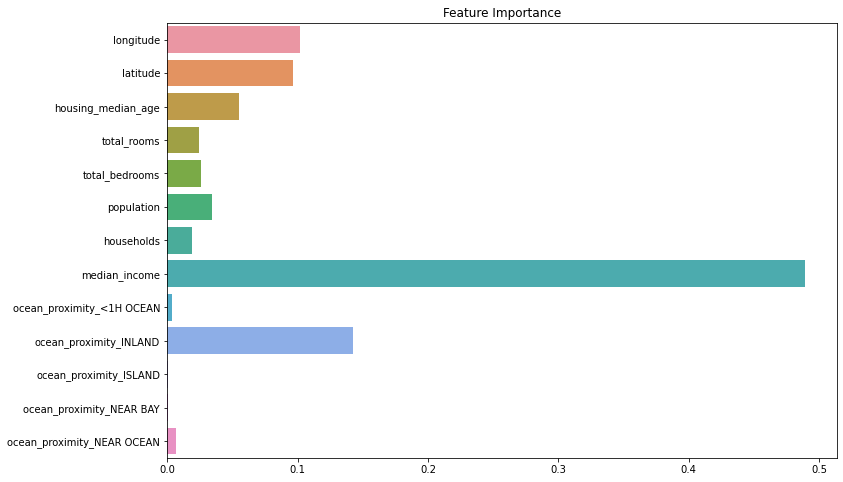

In [39]:
plt.figure(figsize=(12,8))
plt.title('Feature Importance')
sns.barplot(data={'importance': reg.feature_importances_,'feature':list(X)},y='feature',x='importance')
plt.show

The first three levels of decision trees

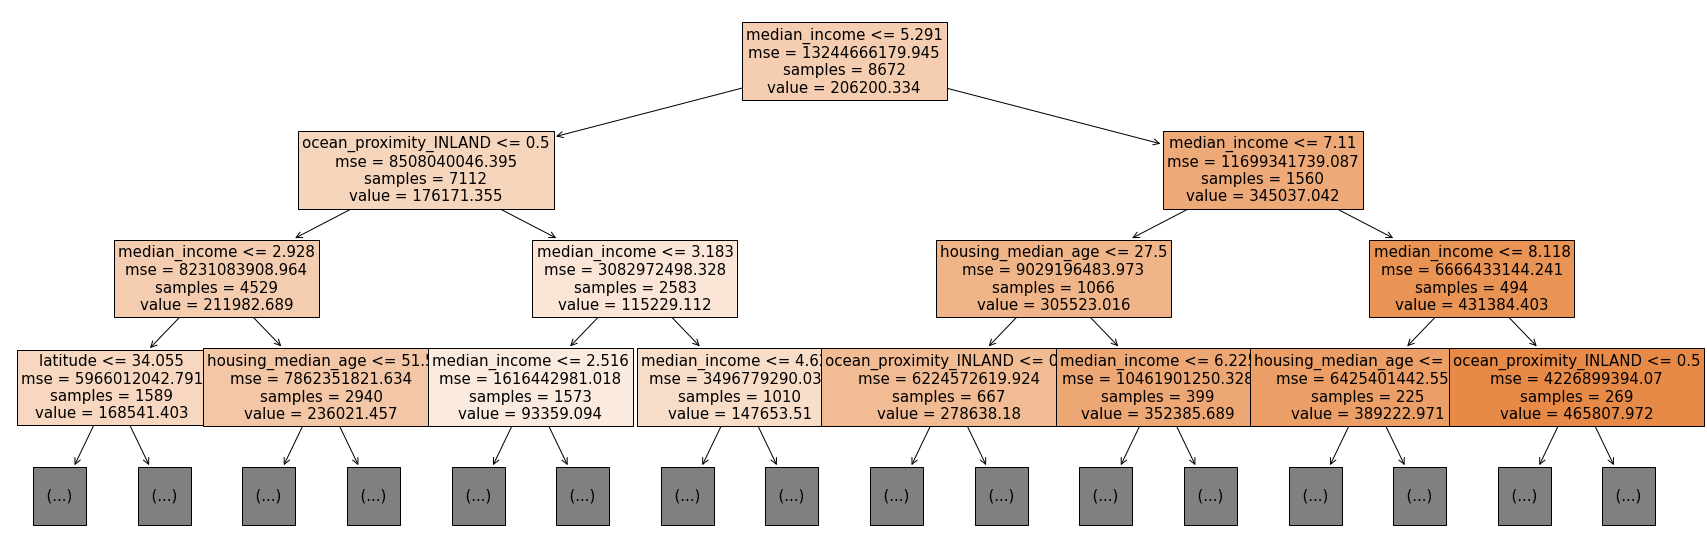

In [38]:
plt.figure(figsize=(30,10))
_ = tree.plot_tree(reg.estimators_[0],  max_depth=3,fontsize=15,feature_names=X.columns,filled=True)